Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [224]:
import numpy as np
import pandas as pd
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, 'np.nan', 5, 2, 4.5, 'np.nan', 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
dd=pd.DataFrame(data,index=labels)

**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [225]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   animal    10 non-null     object
 1   age       10 non-null     object
 2   visits    10 non-null     int64 
 3   priority  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [226]:
dd[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [227]:
dd[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3
c,snake,0.5
d,dog,np.nan
e,dog,5
f,cat,2
g,snake,4.5
h,cat,np.nan
i,dog,7
j,dog,3


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [228]:
dd.loc[['c','d','h'],['animal','age']]

,animal,age
c,snake,0.5
d,dog,np.nan
h,cat,np.nan


**6.** Select only the rows where the number of visits is greater than 3.

In [229]:
dd[dd.visits>3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [230]:
dd[dd['age']=='np.nan']

,animal,age,visits,priority
d,dog,np.nan,3,yes
h,cat,np.nan,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [231]:
change={'np.nan':0}
dd.age=dd.age.replace(change)
ddd=dd.astype({'age':'float'})
d=ddd[(ddd['animal']=='cat')&(ddd['age']<3.0)]
d.drop('h')

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [232]:
change={'np.nan':0}
dd.age=dd.age.replace(change)
ddd=dd.astype({'age':'float'})
ddd[(ddd['age']<=4)&(ddd['age']>=2)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [218]:
dd['age'].loc['f']='1.5'
dd

C:\Users\johne\AppData\Local\Temp\ipykernel_3004\2385350950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['age'].loc['f']='1.5'


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,0.0,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,0.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [233]:
dd.visits.sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [240]:
dd.groupby(['animal']).agg({'age':['mean']})

,age
,mean
animal,
cat,1.875
dog,3.750
snake,2.500


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [241]:
row={'animal':'snake','age':4,'visits':2,'priority':'no'}
extra=pd.DataFrame(row,index=['k'])
extra
new=pd.concat([dd,extra])
new

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,0.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,0.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [242]:
dd=new.drop('k')
dd

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,0.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,0.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [243]:
dd.animal.value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [244]:
dd.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,0.0,1,yes
d,dog,0.0,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [245]:
new={'yes':'True','no':'False'}
dd['priority']=dd['priority'].replace(new)
dd

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,0.0,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,snake,4.5,1,False
h,cat,0.0,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [246]:
change={'snake':'python'}
dd.animal=dd.animal.replace(change)
dd

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,0.0,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,python,4.5,1,False
h,cat,0.0,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**18.** Load the ny-flights dataset to Python

In [247]:
ny=pd.read_csv(r"C:\Users\johne\OneDrive\Desktop\ny-flights.csv")
ny.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


**19.** Which airline ID is present maximum times in the dataset

In [248]:
set=ny['airline_id'].value_counts()
req=set.idxmax()
req

20409

**20.** Draw a plot between dep_delay and arr_delay

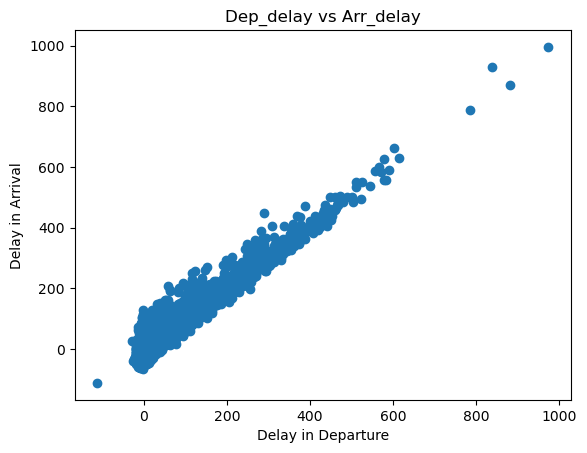

In [249]:
import matplotlib.pyplot as plt
plt.scatter(ny['dep_delay'],ny['arr_delay'])
plt.xlabel('Delay in Departure')
plt.ylabel('Delay in Arrival')
plt.title('Dep_delay vs Arr_delay');